In [64]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas
import geopy
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/all_features_with_logs.csv', index_col = 'Unnamed: 0')

In [3]:
data.head()

,price,sqft_living,grade,lat,long,min_dist_park,closest_distance_to_top_school,closest_distance_to_great_coffee,closest_distance_to_scientology,log_school,log_coffee,log_scientology,log_park
0,221900.0,1180,7,47.5112,-122.257,2.038307,0.261867,4.950174,12.705036,-1.339918,1.599423,2.541998,0.712120
1,538000.0,2570,7,47.7210,-122.319,5.052058,0.682377,14.813168,10.800338,-0.382173,2.695517,2.379577,1.619796
2,180000.0,770,6,47.7379,-122.233,1.337990,2.003000,10.627182,10.838220,0.694646,2.363415,2.383079,0.291169
3,604000.0,1960,7,47.5208,-122.393,2.448557,1.729431,14.476522,11.547177,0.547792,2.672528,2.446441,0.895499
4,510000.0,1680,8,47.6168,-122.045,2.672832,1.179255,8.214909,21.182016,0.164882,2.105951,3.053153,0.983138


C:\Users\danar\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.5520578471144659
Kurtosis: -0.5707062975319399


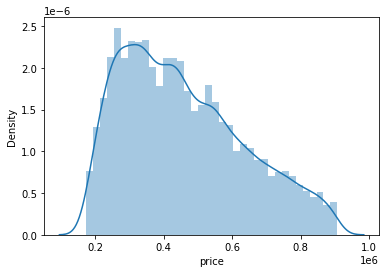

In [4]:
sns.distplot(data['price'])
print("Skewness:", data['price'].skew())
print("Kurtosis:", data['price'].kurt())

In [5]:
x_cols = ['sqft_living','grade','min_dist_park',
       'closest_distance_to_top_school', 'closest_distance_to_great_coffee',
       'closest_distance_to_scientology']
y = ['price']

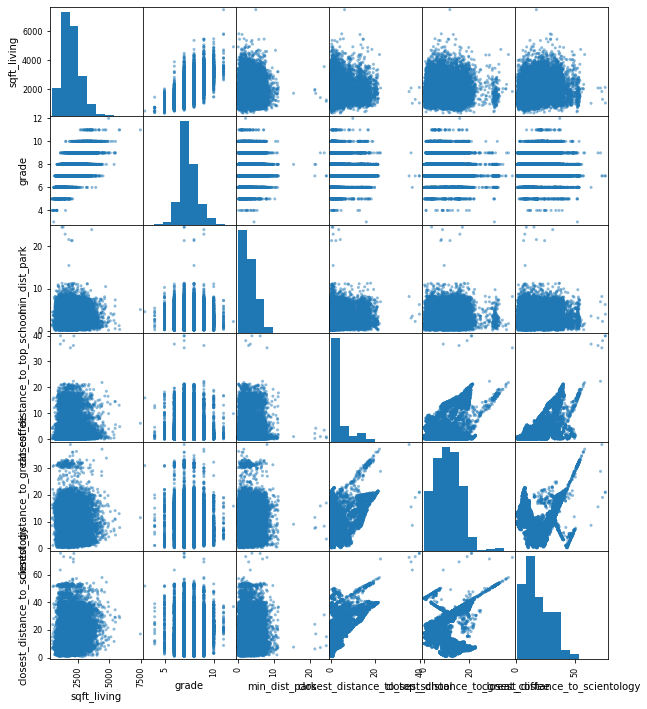

In [6]:
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

### Investigate distribution, skew, kurtosis before filtering price

In [7]:
for col in x_cols: 
    print('Skew: ' + col, data[col].skew())
    print('Kurtosis: ' + col, data[col].kurt())
    print(" ")

Skew: sqft_living 0.7651743646573521
Kurtosis: sqft_living 0.8677398638009155
 
Skew: grade 0.5244129978507855
Kurtosis: grade 0.8217396459765505
 
Skew: min_dist_park 1.2054273673837073
Kurtosis: min_dist_park 3.992897825528368
 
Skew: closest_distance_to_top_school 2.0247707214108757
Kurtosis: closest_distance_to_top_school 3.8621900347917175
 
Skew: closest_distance_to_great_coffee 0.5563691021058518
Kurtosis: closest_distance_to_great_coffee 0.6627342791643227
 
Skew: closest_distance_to_scientology 0.7554175937501572
Kurtosis: closest_distance_to_scientology -0.042972486659312636
 


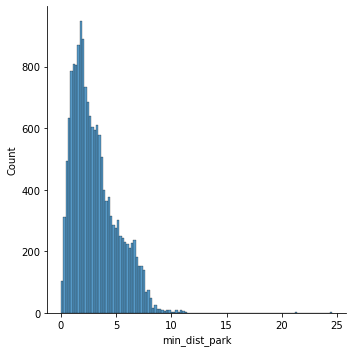

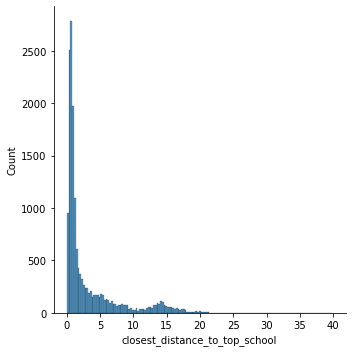

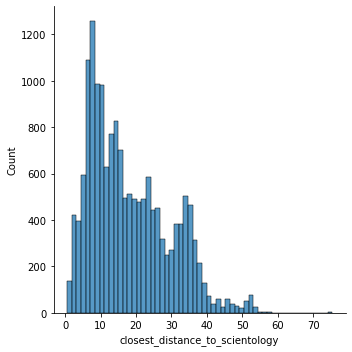

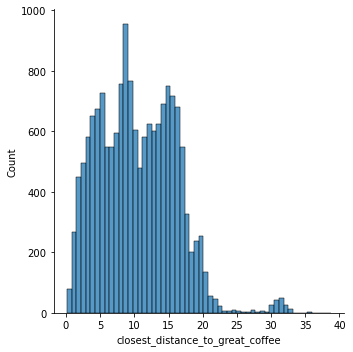

In [8]:
sns.displot(data['min_dist_park']);
sns.displot(data['closest_distance_to_top_school']);
sns.displot(data['closest_distance_to_scientology']);
sns.displot(data['closest_distance_to_great_coffee']);

In [2]:
data = pd.read_csv('data/all_features_with_logs.csv', index_col = 'Unnamed: 0')

In [3]:
data.corr()

,price,sqft_living,grade,lat,long,min_dist_park,closest_distance_to_top_school,closest_distance_to_great_coffee,closest_distance_to_scientology,log_school,log_coffee,log_scientology,log_park,min_dist_park_rv
price,1.000000,0.556844,0.573903,0.451682,0.071937,0.007171,-0.417090,-0.196915,-0.335826,-0.409681,-0.166584,-0.328690,0.008094,0.236916
sqft_living,0.556844,1.000000,0.677593,-0.018889,0.274451,0.013939,0.022599,-0.131208,0.171144,0.081266,-0.119538,0.198512,0.020430,-0.127120
grade,0.573903,0.677593,1.000000,0.052400,0.253632,0.010709,-0.025297,-0.138566,0.114568,0.008770,-0.120682,0.128564,0.016031,-0.053266
lat,0.451682,-0.018889,0.052400,1.000000,-0.130084,0.005220,-0.683230,-0.155797,-0.731545,-0.631036,-0.071953,-0.630270,0.000716,0.272124
long,0.071937,0.274451,0.253632,-0.130084,1.000000,-0.012525,0.006275,-0.347034,0.634874,0.130406,-0.389455,0.624076,-0.007405,-0.450563
min_dist_park,0.007171,0.013939,0.010709,0.005220,-0.012525,1.000000,0.005942,0.013839,-0.006700,0.001859,0.010829,-0.004333,0.904397,0.015223
closest_distance_to_top_school,-0.417090,0.022599,-0.025297,-0.683230,0.006275,0.005942,1.000000,0.347456,0.660764,0.862656,0.252512,0.567420,0.008818,-0.089533
closest_distance_to_great_coffee,-0.196915,-0.131208,-0.138566,-0.155797,-0.347034,0.013839,0.347456,1.000000,0.137435,0.174533,0.917171,-0.042152,0.015431,0.358811
closest_distance_to_scientology,-0.335826,0.171144,0.114568,-0.731545,0.634874,-0.006700,0.660764,0.137435,1.000000,0.655837,0.027002,0.926634,-0.000376,-0.387884
log_school,-0.409681,0.081266,0.008770,-0.631036,0.130406,0.001859,0.862656,0.174533,0.655837,1.000000,0.124451,0.625228,0.003902,-0.232335


In [4]:
data['log_park_rv'] = np.log(data['min_dist_park_rv'])

In [5]:
#some park distances are infinite floats - remove
data = data.replace([np.inf, -np.inf, -0], 0)

In [6]:
x_cols = ['sqft_living','grade','log_park_rv',
       'log_school', 'log_coffee', 'log_scientology']
y = ['price']
columns = data.columns

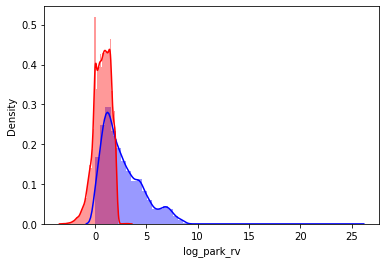

In [7]:
sns.distplot(data['min_dist_park_rv'],color='blue');
sns.distplot(data['log_park_rv'],color='red');

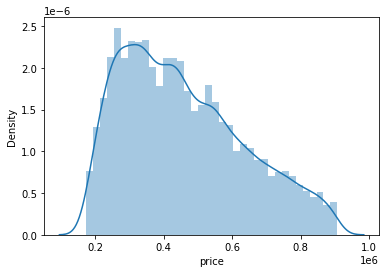

In [8]:
sns.distplot(data['price']);

In [9]:
price_cut = data['price'].quantile(.925)
data_price = data['price'] < price_cut
data = data[data_price]

<AxesSubplot:xlabel='price', ylabel='Density'>

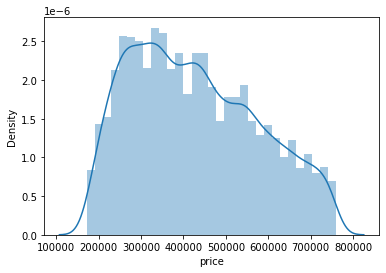

In [10]:
sns.distplot(data['price'])

In [11]:
data['price'].corr(data['log_park_rv'])

0.21532744962904626

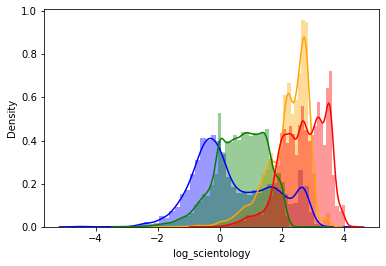

In [12]:
sns.distplot(data['log_school'], color = 'blue');
sns.distplot(data['log_coffee'], color = 'orange');
#sns.distplot(data['sqft_living']);
sns.distplot(data['log_park_rv'], color = 'green');
sns.distplot(data['log_scientology'], color = 'red');

In [13]:
for x in x_cols: 
    print(x + ': ' + str(data[x].quantile(.925)))

sqft_living: 2850.0
grade: 9.0
log_park_rv: 1.7815904223133372
log_school: 2.59906913375
log_coffee: 2.89313282475
log_scientology: 3.5843169395


In [14]:
#school_filtered = data['log_school'] < data['log_school'].quantile(.95)
#print('school: ' + str(school_filtered.sum()))
#park_filtered = data['log_park'] < data['log_park'].quantile(.95)
#print('park: ' + str(park_filtered.sum()))
#coffee_filtered = data['log_coffee'] < data['log_coffee'].quantile(.95)
#print('coffee: ' + str(coffee_filtered.sum()))
#scientology_filtered = data['log_scientology'] < data['log_scientology'].quantile(.95)
#print('scientology: ' + str(scientology_filtered.sum()))
#grade_filtered = data['grade'] < data['grade'].quantile(.95)
#print('grade: ' + str(grade_filtered.sum()))
#sqft_living_filtered = data['sqft_living'] < data['sqft_living'].quantile(.95)
#print('sqft_living: ' + str(sqft_living_filtered.sum()))
#print(data.shape)

In [15]:
sqft_living_filtered = data['sqft_living'] < data['sqft_living'].quantile(.95)
data = data[sqft_living_filtered]

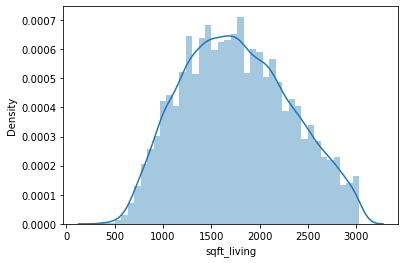

In [16]:
sns.distplot(data['sqft_living']);

In [17]:
f = 'price ~ sqft_living'
model = ols(formula = f, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     3621.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:37:48   Log-Likelihood:            -1.9085e+05
No. Observations:               14460   AIC:                         3.817e+05
Df Residuals:                   14458   BIC:                         3.817e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.105e+05   3635.051     57.915      0.000    2.03e+05    2.18e+05
sqft_living   118.2398      1.965     60.172      0.000     114.388     122.092
==============================================================================
Omnibus:                      877.120   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              545.725
Skew:                           0.347   Prob(JB):                    3.14e-119
Kurtosis:                       2.349   Cond. No.                     6.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
f = 'price ~ sqft_living + log_school'
model = ols(formula = f, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     6102.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:37:48   Log-Likelihood:            -1.8804e+05
No. Observations:               14460   AIC:                         3.761e+05
Df Residuals:                   14457   BIC:                         3.761e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.087e+05   2993.404     69.714      0.000    2.03e+05    2.15e+05
sqft_living   132.6600      1.627     81.513      0.000     129.470     135.850
log_school  -5.809e+04    701.140    -82.854      0.000   -5.95e+04   -5.67e+04
==============================================================================
Omnibus:                      237.017   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.672
Skew:                           0.300   Prob(JB):                     1.36e-55
Kurtosis:                       3.242   Cond. No.                     6.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
f = 'price ~ sqft_living + log_school + grade'
model = ols(formula = f, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     5011.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:37:48   Log-Likelihood:            -1.8731e+05
No. Observations:               14460   AIC:                         3.746e+05
Df Residuals:                   14456   BIC:                         3.747e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.786e+04   7851.307     -9.917      0.000   -9.33e+04   -6.25e+04
sqft_living    86.6990      1.942     44.639      0.000      82.892      90.506
log_school  -5.664e+04    667.727    -84.822      0.000   -5.79e+04   -5.53e+04
grade         5.05e+04   1289.582     39.161      0.000     4.8e+04     5.3e+04
==============================================================================
Omnibus:                      436.615   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              495.528
Skew:                           0.403   Prob(JB):                    2.50e-108
Kurtosis:                       3.414   Cond. No.                     1.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
f = 'price ~ sqft_living + log_school + grade + log_park_rv'
model = ols(formula = f, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     4327.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:37:48   Log-Likelihood:            -1.8677e+05
No. Observations:               14460   AIC:                         3.736e+05
Df Residuals:                   14455   BIC:                         3.736e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.774e+04   7588.278    -12.881      0.000   -1.13e+05   -8.29e+04
sqft_living    92.9239      1.881     49.411      0.000      89.238      96.610
log_school  -5.238e+04    655.897    -79.853      0.000   -5.37e+04   -5.11e+04
grade        4.825e+04   1244.359     38.779      0.000    4.58e+04    5.07e+04
log_park_rv  3.427e+04   1025.843     33.411      0.000    3.23e+04    3.63e+04
==============================================================================
Omnibus:                      316.037   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.720
Skew:                           0.329   Prob(JB):                     3.46e-78
Kurtosis:                       3.399   Cond. No.                     1.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
f = 'price ~ sqft_living + log_school + grade + log_park_rv + log_scientology'
model = ols(formula = f, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     3844.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:37:48   Log-Likelihood:            -1.8635e+05
No. Observations:               14460   AIC:                         3.727e+05
Df Residuals:                   14454   BIC:                         3.728e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        8461.2488   8202.080      1.032      0.302   -7615.879    2.45e+04
sqft_living        98.0108      1.835     53.423      0.000      94.415     101.607
log_school      -3.757e+04    810.874    -46.337      0.000   -3.92e+04    -3.6e+04
grade            4.994e+04   1209.889     41.273      0.000    4.76e+04    5.23e+04
log_park_rv      2.176e+04   1082.848     20.096      0.000    1.96e+04    2.39e+04
log_scientology -4.674e+04   1584.316    -29.503      0.000   -4.98e+04   -4.36e+04
==============================================================================
Omnibus:                      351.564   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              419.324
Skew:                           0.330   Prob(JB):                     8.81e-92
Kurtosis:                       3.510   Cond. No.                     1.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
f = 'price ~ sqft_living + log_school + grade + log_park_rv + log_scientology'
model = ols(formula = f, data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     3844.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:37:48   Log-Likelihood:            -1.8635e+05
No. Observations:               14460   AIC:                         3.727e+05
Df Residuals:                   14454   BIC:                         3.728e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        8461.2488   8202.080      1.032      0.302   -7615.879    2.45e+04
sqft_living        98.0108      1.835     53.423      0.000      94.415     101.607
log_school      -3.757e+04    810.874    -46.337      0.000   -3.92e+04    -3.6e+04
grade            4.994e+04   1209.889     41.273      0.000    4.76e+04    5.23e+04
log_park_rv      2.176e+04   1082.848     20.096      0.000    1.96e+04    2.39e+04
log_scientology -4.674e+04   1584.316    -29.503      0.000   -4.98e+04   -4.36e+04
==============================================================================
Omnibus:                      351.564   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              419.324
Skew:                           0.330   Prob(JB):                     8.81e-92
Kurtosis:                       3.510   Cond. No.                     1.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
data_quant = data.copy()

In [24]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
to_transform= ['sqft_living', 'closest_distance_to_great_coffee', 
               'min_dist_park_rv', 'closest_distance_to_top_school', 'closest_distance_to_scientology', 'price']
data_quant[to_transform] = qt.fit_transform(data_quant[to_transform])

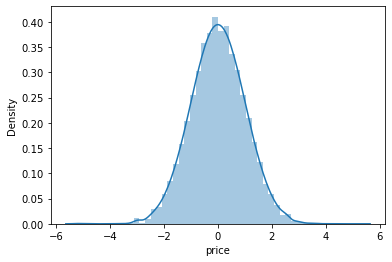

In [25]:
sns.distplot(data_quant['price']);

In [26]:
f = 'price ~ sqft_living'
model = ols(formula = f, data = data_quant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     3625.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:37:49   Log-Likelihood:                -18935.
No. Observations:               14460   AIC:                         3.787e+04
Df Residuals:                   14458   BIC:                         3.789e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0013      0.007     -0.177      0.860      -0.016       0.013
sqft_living     0.4441      0.007     60.211      0.000       0.430       0.459
==============================================================================
Omnibus:                        2.145   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                2.128
Skew:                           0.019   Prob(JB):                        0.345
Kurtosis:                       3.045   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
f = 'price ~ sqft_living + grade'
model = ols(formula = f, data = data_quant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     2628.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:37:49   Log-Likelihood:                -18311.
No. Observations:               14460   AIC:                         3.663e+04
Df Residuals:                   14457   BIC:                         3.665e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.8409      0.079    -35.981      0.000      -2.996      -2.686
sqft_living     0.2510      0.009     28.332      0.000       0.234       0.268
grade           0.3907      0.011     36.112      0.000       0.370       0.412
==============================================================================
Omnibus:                       34.532   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.134
Skew:                           0.051   Prob(JB):                     1.17e-09
Kurtosis:                       3.241   Cond. No.                         82.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
f = 'price ~ sqft_living + grade + log_school'
model = ols(formula = f, data = data_quant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     5229.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:37:49   Log-Likelihood:                -15240.
No. Observations:               14460   AIC:                         3.049e+04
Df Residuals:                   14456   BIC:                         3.052e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.3587      0.064    -36.802      0.000      -2.484      -2.233
sqft_living     0.3279      0.007     45.429      0.000       0.314       0.342
grade           0.3465      0.009     39.539      0.000       0.329       0.364
log_school     -0.3968      0.005    -87.459      0.000      -0.406      -0.388
==============================================================================
Omnibus:                      516.518   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1286.289
Skew:                           0.171   Prob(JB):                    4.85e-280
Kurtosis:                       4.421   Cond. No.                         83.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
f = 'price ~ sqft_living + grade + log_school + log_park_rv'
model = ols(formula = f, data = data_quant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     4401.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:37:49   Log-Likelihood:                -14794.
No. Observations:               14460   AIC:                         2.960e+04
Df Residuals:                   14455   BIC:                         2.964e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.4169      0.062    -38.872      0.000      -2.539      -2.295
sqft_living     0.3485      0.007     49.554      0.000       0.335       0.362
grade           0.3330      0.009     39.131      0.000       0.316       0.350
log_school     -0.3703      0.004    -82.578      0.000      -0.379      -0.362
log_park_rv     0.2126      0.007     30.339      0.000       0.199       0.226
==============================================================================
Omnibus:                      489.609   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1302.888
Skew:                           0.111   Prob(JB):                    1.21e-283
Kurtosis:                       4.454   Cond. No.                         83.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
f = 'price ~ sqft_living + grade + log_school + log_park_rv + log_scientology'
model = ols(formula = f, data = data_quant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     3912.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:37:49   Log-Likelihood:                -14366.
No. Observations:               14460   AIC:                         2.874e+04
Df Residuals:                   14454   BIC:                         2.879e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.6247      0.066    -24.619      0.000      -1.754      -1.495
sqft_living         0.3676      0.007     53.605      0.000       0.354       0.381
grade               0.3445      0.008     41.657      0.000       0.328       0.361
log_school         -0.2686      0.006    -48.477      0.000      -0.279      -0.258
log_park_rv         0.1265      0.007     17.108      0.000       0.112       0.141
log_scientology    -0.3214      0.011    -29.694      0.000      -0.343      -0.300
==============================================================================
Omnibus:                      589.690   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1787.643
Skew:                           0.112   Prob(JB):                         0.00
Kurtosis:                       4.708   Cond. No.                         96.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
filtered_price = data['price'].between(300000,800000)
filtered_data = data[filtered_price]
filtered_data.head()

,price,sqft_living,grade,lat,long,min_dist_park,closest_distance_to_top_school,closest_distance_to_great_coffee,closest_distance_to_scientology,log_school,log_coffee,log_scientology,log_park,min_dist_park_rv,log_park_rv
1,538000,2570,7,47.7210,-122.319,5.052058,0.682377,14.813168,10.800338,-0.382173,2.695517,2.379577,1.619796,3.52051,1.258606
3,604000,1960,7,47.5208,-122.393,2.448557,1.729431,14.476522,11.547177,0.547792,2.672528,2.446441,0.895499,1.52156,0.419736
4,510000,1680,8,47.6168,-122.045,2.672832,1.179255,8.214909,21.182016,0.164882,2.105951,3.053153,0.983138,2.31352,0.838770
9,323000,1890,7,47.3684,-122.031,5.146491,0.847291,16.300571,35.338388,-0.165711,2.791200,3.564970,1.638315,2.00144,0.693867
11,468000,1160,7,47.6900,-122.292,3.230678,0.598800,10.906520,8.748762,-0.512827,2.389361,2.168912,1.172692,3.43172,1.233062


In [32]:
f = 'price ~ sqft_living + grade + log_school + log_park_rv + log_scientology'
model = ols(formula = f, data = filtered_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     1374.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:37:49   Log-Likelihood:            -1.3929e+05
No. Observations:               10814   AIC:                         2.786e+05
Df Residuals:                   10808   BIC:                         2.786e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        8.009e+04   9565.050      8.374      0.000    6.13e+04    9.88e+04
sqft_living        80.3776      2.104     38.202      0.000      76.253      84.502
grade            4.327e+04   1372.060     31.537      0.000    4.06e+04     4.6e+04
log_school      -2.976e+04    990.284    -30.048      0.000   -3.17e+04   -2.78e+04
log_park_rv      2.336e+04   1315.944     17.751      0.000    2.08e+04    2.59e+04
log_scientology -3.574e+04   1782.888    -20.045      0.000   -3.92e+04   -3.22e+04
==============================================================================
Omnibus:                      156.762   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.368
Skew:                           0.301   Prob(JB):                     3.35e-36
Kurtosis:                       3.033   Cond. No.                     2.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
filtered_price = data['price'].between(300000,700000)
filtered_data1 = data[filtered_price]

f = 'price ~ sqft_living + grade + log_school + log_park_rv + log_scientology'
model = ols(formula = f, data = filtered_data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     1107.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:39:59   Log-Likelihood:            -1.3160e+05
No. Observations:               10275   AIC:                         2.632e+05
Df Residuals:                   10269   BIC:                         2.633e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.167e+05   9282.092     12.570      0.000    9.85e+04    1.35e+05
sqft_living        69.3325      2.017     34.379      0.000      65.379      73.286
grade            3.825e+04   1326.907     28.829      0.000    3.57e+04    4.09e+04
log_school      -2.746e+04    941.177    -29.181      0.000   -2.93e+04   -2.56e+04
log_park_rv      2.109e+04   1245.170     16.941      0.000    1.87e+04    2.35e+04
log_scientology -3.024e+04   1706.267    -17.723      0.000   -3.36e+04   -2.69e+04
==============================================================================
Omnibus:                      120.337   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.791
Skew:                           0.264   Prob(JB):                     1.32e-27
Kurtosis:                       2.900   Cond. No.                     2.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
filtered_price = data['price'].between(300000,500000)
filtered_data2 = data[filtered_price]

f = 'price ~ sqft_living + grade + log_school + log_park_rv + log_scientology'
model = ols(formula = f, data = filtered_data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     285.4
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          2.63e-277
Time:                        12:41:14   Log-Likelihood:                -81399.
No. Observations:                6623   AIC:                         1.628e+05
Df Residuals:                    6617   BIC:                         1.628e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.853e+05   7320.807     38.966      0.000    2.71e+05       3e+05
sqft_living        25.8353      1.536     16.818      0.000      22.824      28.847
grade            1.409e+04   1049.017     13.432      0.000     1.2e+04    1.61e+04
log_school      -1.414e+04    694.721    -20.347      0.000   -1.55e+04   -1.28e+04
log_park_rv      5985.3889    872.045      6.864      0.000    4275.900    7694.878
log_scientology -1.426e+04   1318.690    -10.812      0.000   -1.68e+04   -1.17e+04
==============================================================================
Omnibus:                      457.111   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.233
Skew:                           0.106   Prob(JB):                     2.94e-37
Kurtosis:                       2.248   Cond. No.                     2.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
for col in x_cols: 
    print(col)
    print('Skew: ', filtered_data[col].skew())
    print('Kurtosis: ', filtered_data[col].kurt())
    print('Correlation with price: ', filtered_data['price'].corr(filtered_data[col]))
    print(" ")

sqft_living
Skew:  0.03375616714366243
Kurtosis:  -0.7625419504065003
Correlation with price:  0.33485777142107864
 
grade
Skew:  0.327016782407367
Kurtosis:  0.6179117074940388
Correlation with price:  0.3708249880142818
 
log_park_rv
Skew:  -0.5427384258977883
Kurtosis:  0.10831607271923094
Correlation with price:  0.2326619720077994
 
log_school
Skew:  0.44387597214219987
Kurtosis:  0.2795810222535442
Correlation with price:  -0.2753132684936939
 
log_coffee
Skew:  -1.2274293137007257
Kurtosis:  1.7599623018016963
Correlation with price:  -0.12681784531460225
 
log_scientology
Skew:  -0.44799451507848115
Kurtosis:  0.10780998708762368
Correlation with price:  -0.23878564680793612
 


### Importing final dataset to rerun some models and use RFE to double check for insignificant features

In [45]:
final_data = pd.read_csv('data/all_features_ppsqft_quant.csv', index_col = 'Unnamed: 0')

In [63]:
#modeling with statsmodels 

features = ['quant_sqft_living','quant_coffee', 'quant_parks', 'quant_schools', 'quant_scientology', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'quant_interaction']
target = ['quant_price']
X = final_data[features]
y = final_data[target]

# use train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

lm10 = LinearRegression().fit(X_train, y_train)
lm10_preds = lm10.predict(X_test)
print('R2: ', r2_score(y_test, lm10_preds))

R2:  0.7559870492262424


In [54]:
#modeling with sk learn

f = 'price ~ quant_sqft_living + quant_coffee + quant_parks + quant_schools + quant_scientology + quant_interaction + grade_5 + grade_6 + grade_7 + grade_8 + grade_9 + grade_10 + grade_11 + grade_12 + grade_13'
model = ols(formula = f, data = final_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     3391.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:48:46   Log-Likelihood:            -2.3130e+05
No. Observations:               17495   AIC:                         4.626e+05
Df Residuals:                   17479   BIC:                         4.628e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.136e+05   3.36e+04     15.269      0.000    4.48e+05     5.8e+05
quant_sqft_living  1.169e+05   1519.687     76.953      0.000    1.14e+05     1.2e+05
quant_coffee      -9276.2282   1080.794     -8.583      0.000   -1.14e+04   -7157.765
quant_parks       -1349.8124   1008.289     -1.339      0.181   -3326.160     626.535
quant_schools      2.095e+04   5830.000      3.593      0.000    9522.064    3.24e+04
quant_scientology -3.319e+04   3863.765     -8.589      0.000   -4.08e+04   -2.56e+04
quant_interaction -8.045e+04   8458.513     -9.511      0.000    -9.7e+04   -6.39e+04
grade_5            -5.38e+04   3.48e+04     -1.545      0.122   -1.22e+05    1.45e+04
grade_6           -9.118e+04   3.36e+04     -2.712      0.007   -1.57e+05   -2.53e+04
grade_7           -8.103e+04   3.36e+04     -2.411      0.016   -1.47e+05   -1.51e+04
grade_8           -2.109e+04   3.38e+04     -0.625      0.532   -8.73e+04    4.51e+04
grade_9            9.706e+04    3.4e+04      2.856      0.004    3.04e+04    1.64e+05
grade_10           2.339e+05   3.43e+04      6.818      0.000    1.67e+05    3.01e+05
grade_11           4.691e+05   3.51e+04     13.374      0.000       4e+05    5.38e+05
grade_12           8.308e+05   3.93e+04     21.118      0.000    7.54e+05    9.08e+05
grade_13           1.585e+06   6.45e+04     24.559      0.000    1.46e+06    1.71e+06
==============================================================================
Omnibus:                     5325.799   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48210.631
Skew:                           1.202   Prob(JB):                         0.00
Kurtosis:                      10.769   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
y_predict = lm10.predict(X_test)

X2 = sm.add_constant(X)

# create an OLS model
model = sm.OLS(y, X2)

# fit the data
est = model.fit()

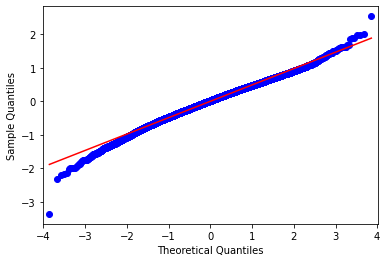

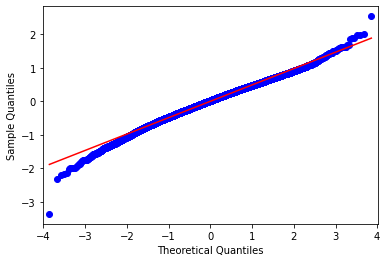

In [67]:
# quick qq plot to make sure everything looks normal
sm.qqplot(est.resid, line='s')

In [84]:
def lin_reg(X, y):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    linreg = LinearRegression()
    linreg.fit(X_train,y_train)
    y_hat = linreg.predict(X_test)
    y_hat_train = linreg.predict(X_train)
    print('R_squared:', linreg.score(X, y))
    #Display errors
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat))
    print('Root Mean Squared Error test:', np.sqrt(mean_squared_error(y_test, y_hat)))
    print('Root Mean Squared Error train:', np.sqrt(mean_squared_error(y_train, y_hat_train)))
    #Compare predicted and actual values
    print('Mean Predicted Selling Price:', y_hat.mean())
    print('Mean Selling Price:', y_test.mean())
    return linreg

In [85]:
lin_reg(X,y)

R_squared Score: 0.7609658488385411
Mean Absolute Error: 0.38460754823840315
Root Mean Squared Error test: 0.4862495691903268
Root Mean Squared Error train: 0.49021643169065243
Mean Predicted Selling Price: -0.013720870872650618
Mean Selling Price: quant_price   -0.01708
dtype: float64


LinearRegression()

In [87]:
#RFE to check for insignificant features 
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

estimator = SVR(kernel="linear")

selector = RFE(estimator, step=1)
selector = selector.fit(X, y)

#Take a look at the R2 with only the most valuable features
X_RFE = X[X.columns[selector.support_]]
lin_reg(X_RFE, y)

R_squared Score: 0.7079833339830431
Mean Absolute Error: 0.4309881631133663
Root Mean Squared Error test: 0.539214067371915
Root Mean Squared Error train: 0.541241693093157
Mean Predicted Selling Price: -0.012703459398018207
Mean Selling Price: quant_price   -0.016028
dtype: float64


LinearRegression()